## Visually inspected analysis

In [83]:
import os
import sys
import glob
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
from utility.utility import short_list, elements_containing_string, contains_substring, slice_string_at_char, get_metadata_item
from utility.algorithm import peak_detect, n_max_frequencies, n_max_intensities
from tqdm import tqdm
from scipy.signal import find_peaks

In [84]:
def import_files(path, dtype):
    '''
    Import files in the syntax that I used in the notebook. That is, choose the path that contains
    all the files, then obtain all dat and inf files as dictionaries that can be accessed by filename. 
    '''

    filename = "*.dat"
    files =  [ p for p in Path(path).glob(filename) ]
    file_dict = dict()
    for file in files:
        with open(file, 'rb') as f:
            # key of the dict is the filename, value the data.
            file_dict[os.path.basename(file)] = np.fromfile(f, np.float32)

    metadata_dict = dict()
    filename = "*.inf"
    files =  [ p for p in Path(path).glob(filename) ]
    for file in files:
        with open(file) as f:
            metadata_dict[os.path.basename(file)] = f.readlines()

    return file_dict, metadata_dict 

dataset_dat = 'L83080_SAP0_BEAM0_DM39.66.dat'
dataset_inf = 'L83080_SAP0_BEAM0_DM39.66.inf'

# skipped datasets: 61, 78

In [85]:
data_dict, metadata_dict = import_files(path="../../LOFAR_2e_jaars_RP_2022_voor_studenten/Data_Pulsar2", dtype="float32")
nbins_dict = dict()
dt_dict = dict()
mjd_dict = dict()
for key, val in metadata_dict.items():
    nbins_dict[key] = int(get_metadata_item(metadata_dict[key], 'Number of bins in the time series'))
    dt_dict[key] = float(get_metadata_item(metadata_dict[key], 'Width of each time series bin (sec)'))
    mjd_dict[key] = float(get_metadata_item(metadata_dict[key], 'Epoch of observation (MJD)'))

In [86]:
dt = list(dt_dict.values())[0]
nbins = list(nbins_dict.values())[0]
MJD = mjd_dict['L83080_SAP0_BEAM0_DM39.66.inf']
print( dt )
print( nbins )
print(MJD)

2.04799998755334e-05
8800000
56300.45492639893


In [87]:
first_dataset = np.array(data_dict[dataset_dat])
first_metadataset = metadata_dict[dataset_inf]

In [88]:
dt = list(dt_dict.values())[0]
nbins = list(nbins_dict.values())[0]

frequencies_first_dataset  = np.fft.fftfreq(nbins, dt)[1:]
transform_first_dataset = np.abs(np.fft.fft(first_dataset) / len(first_dataset))[1:]
#half_index = int(len(transform_first_dataset)/2)
#transform_first_dataset = transform_first_dataset[0:half_index]

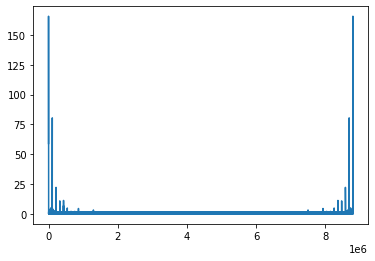

In [89]:
plt.plot(transform_first_dataset)

In [90]:
height_threshold = 2 # Just reading off an appropriate value from the graph
distance_between_peaks = 500
peaks_index, properties = find_peaks(transform_first_dataset, height=height_threshold, distance=distance_between_peaks)
peak_frequencies = [frequencies_first_dataset[i] for i in tqdm(peaks_index)]

100%|██████████| 56/56 [00:00<?, ?it/s]


In [91]:
nharmonics = 5
max_amplitudes = n_max_intensities(properties["peak_heights"], n=(2 * nharmonics)) # 2x since the graph is symmetric.
harmonics = n_max_frequencies( frequencies_first_dataset, transform_first_dataset,  max_amplitudes)

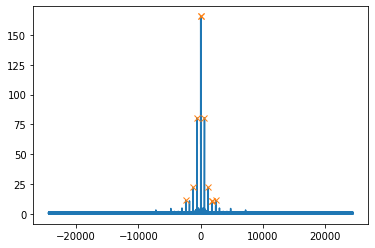

In [92]:
# Just change the height threshold above if we want less peaks to be marked.
plt.clf()
plt.plot(frequencies_first_dataset, transform_first_dataset,'-', harmonics, max_amplitudes,'x')

In [93]:
for peak in peak_frequencies:
    print(peak)

print('Julian day (modified):', MJD)

0.027743253009517896
2.8464577587765363
6.669478023488103
48.245516983551624
93.33385177462011
116.33300851951044
185.33047875418146
208.3296354990718
231.32879224396214
277.3271057337428
323.32541922352345
370.6609575083629
393.66011425325325
416.6592709981436
601.3849468367175
693.9863767318864
799.9822491800505
1018.6490207504686
1202.769893673435
1804.1603891607547
2399.924552937744
2405.545335997472
3006.9302828341897
3608.3152296709072
4209.705725158226
4799.860203176691
7197.753949994139
7201.748978427509
-7201.748978427509
-7197.753949994139
-4799.860203176691
-4209.705725158226
-3608.3152296709072
-3006.9302828341897
-2405.545335997472
-2399.924552937744
-1804.1603891607547
-1202.769893673435
-1018.6490207504686
-799.9822491800505
-693.9863767318864
-601.3849468367175
-416.6592709981436
-393.66011425325325
-370.6609575083629
-323.32541922352345
-277.3271057337428
-231.32879224396214
-208.3296354990718
-185.33047875418146
-116.33300851951044
-93.33385177462011
-48.2455169835516

In [130]:
# found peaks:
periods_datasets = []

#29
frequencies1 = [601.418238740329, (1202.836477480658/2), (1804.254716220987/3), (2405.672954961316/4), (3007.091193701645/5), (3608.509432441974/6)]
period1 = 1/(np.mean(frequencies1))
periods_datasets.append(period1)
#79
frequencies2 = [601.3960441379214, (1202.7920882758428/2), (1804.193681064366/3), (2405.5897252022874/4), (3006.9857693402087/5), (3608.38181347813/6)]
period2 = 1/(np.mean(frequencies2))
periods_datasets.append(period2)
#80
frequencies3 = [601.3849468367175, (1202.769893673435/2), (1804.1603891607547/3), (2405.545335997472/4), (3006.9302828341897/5), (3608.3152296709072/6), (4209.705725158226/7), (4799.860203176691/8)]
period3 = 1/(np.mean(frequencies3))
periods_datasets.append(period3)
#81
frequencies4 = [601.3849468367175, (1202.769893673435/2), (1804.1492918595509/3), (2405.5342386962684/4), (3006.919185532986/5), (3608.3041323697034/6)]
period4 = 1/(np.mean(frequencies4))
periods_datasets.append(period4)
#82
frequencies5 = [601.3904954873194, (1202.7809909746388/2), (1804.1714864619585/3), (2405.5619819492777/4), (3006.9524774365973/5), (3608.342972923917/6), (4209.733468411237/7)]
period5 = 1/(np.mean(frequencies5))
periods_datasets.append(period5)
#83
frequencies6 = [601.4015927885233, (1202.8087342276485/2), (1804.2103270161717/3), (2405.617468455297/4), (3007.01906124382/5), (3608.426202682945/6)]
period6 = 1/(np.mean(frequencies6))
periods_datasets.append(period6)
#84
frequencies7 = [601.418238740329, (1202.84202613126/2), (1804.2602648715888/3), (2405.68405226252/4), (3007.1022910028487/5)]
period7 = 1/(np.mean(frequencies7))
periods_datasets.append(period7)
#85
frequencies8 = [601.4348846921347, (1202.8697693842694/2), (1804.2991054258023/3), (2405.733990117937/4), (3007.1688748100714/5), (3608.6037595022062/6)]
period8 = 1/(np.mean(frequencies8))
periods_datasets.append(period8)
#86
frequencies9 = [601.4404333427366, (1202.8808666854732/2), (1804.3213000282099/3), (2405.7561847203447/4), (3007.196618063081/5),]
period9 = 1/(np.mean(frequencies9))
periods_datasets.append(period9)
#87
frequencies10 = [601.4348846921347, (1202.8697693842694/2), (1804.310202727006/3), (2405.745087419141/4), (3007.179972111275/5), (3608.61485680341/6)]
period10 = 1/(np.mean(frequencies10))
periods_datasets.append(period10)
#88
frequencies11 = [601.4293360415328, (1202.8531234324637/2), (1804.2824594739964/3), (2405.7062468649274/4)]
period11 = 1/(np.mean(frequencies11))
periods_datasets.append(period11)


# found MJD's
list_MJD =  list( mjd_dict.values() )
# but we skip the following datasets for now:
del list_MJD[1] # skip dataset 2
del list_MJD[2] # skip dataset 3
del list_MJD[-1] # skip dataset 14

list_MJD = list(reversed(sorted(list_MJD)))

print(len(list_MJD))
print(len(periods_datasets))
print(periods_datasets)
print(list_MJD)



11
11
[0.0016627364046931813, 0.0016627953391468015, 0.0016633109334621597, 0.0016628308808149732, 0.0016628131097909664, 0.0016627767166011553, 0.0016627310867354046, 0.0016626928137830803, 0.0016626764262373586, 0.0016626879562865453, 0.001662710837899844]
[56300.48270470806, 56300.4688155539, 56300.44103724313, 56300.42714808649, 56300.413258929024, 56300.39936977075, 56300.38548061164, 56300.35770229113, 56300.34381312978, 56300.32992396778, 56299.61949397883]


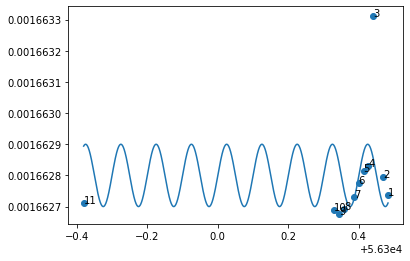

In [138]:
plt.scatter(list_MJD, periods_datasets)

annotations = range(1, len(periods_datasets) + 1)

for i, label in enumerate(annotations):
    plt.annotate(label, (list_MJD[i], periods_datasets[i]))

l_x = [x for x in np.arange(min(list_MJD), max(list_MJD), dt)]
#l_x = [x for x in np.arange(-np.pi, np.pi, 0.01)]

def sin_model(x, A, B, c, d):
    return A + B*np.sin(c*np.pi*x -d)

l_y = [sin_model(x, A=0.0016628, B=0.0000001, c=20, d=0) for x in l_x]

plt.plot(l_x,l_y)

## fit first try

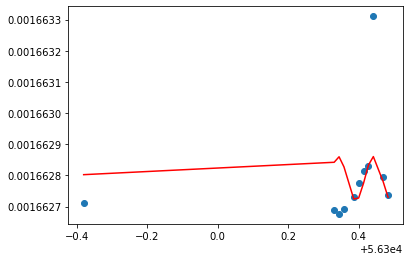

## Repeating the analysis, but automized.

The automatisation of what we did above is straightforward in principle, it is a matter of creating array versions of all the relevant variables, with the $i$ th element corresponding to the $i$ th dataset. It is then a matter of bookkeeping and of making sure we translate everything correctly.

In [144]:
frequencies = []
transforms = []
for val in data_dict.values():
    frequencies.append( ( np.fft.fftfreq(nbins, dt) )[1:] )
    transforms.append( np.abs( ( np.fft.fft(val) / len(val) )[1:] ) )  # division is to normalize the transform.

For now we still ignore datasets 2,3 and 14.

In [145]:
del frequencies[2]
del frequencies[3]
del frequencies[-1]

In [146]:
# TODO: It would be great to create numpy arrays to do this step immediately two cells above,
# but the delete operator is not defined for numpy arrays, so we only convert to numpy arrays afterwards.
frequencies = np.array(frequencies)
transforms = np.array(transforms)

In [168]:
#for f, t in zip(frequencies, transforms):
#    plt.plot(f, np.abs(t) )
#    plt.xlim(0) # to remove the symmetry from the plot.
#    plt.figure()

In [148]:
height_threshold = 2 # Just reading off an appropriate value from the graph
distance_between_peaks = 500

In [149]:
peak_indices = []
peak_heights = []
peak_frequencies = []
for i, (f, t) in enumerate( zip( frequencies, transforms ) ):
    indices, props = find_peaks(t, height=height_threshold, distance=distance_between_peaks)
    peak_indices.append(indices)
    peak_heights.append(props["peak_heights"])
    
    peak_frequencies.append( [f for i in tqdm(peak_indices[i])] )

peak_indices = np.array( peak_indices )
peak_heights = np.array( peak_heights )
# NOTE: converting peak_frequencies to np array takes too much memory.
#peak_frequencies = np.array( peak_frequencies )
print(type(peak_indices))
print(type(peak_heights))
print(type(peak_frequencies))

100%|██████████| 66/66 [00:00<?, ?it/s]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>



C:\Users\bvptr\AppData\Local\Temp/ipykernel_16280/1825242877.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_indices = np.array( peak_indices )
C:\Users\bvptr\AppData\Local\Temp/ipykernel_16280/1825242877.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_heights = np.array( peak_heights )


In [150]:
nharmonics = 5

In [162]:
max_amplitudes = []
harmonics = []

for i, (f, t, h) in enumerate( zip( frequencies, transforms, peak_heights) ):
    max_amplitudes.append( n_max_intensities(peak_heights[i], n=(2 * nharmonics)) ) # 2x since the graph is symmetric.
    harmonics.append( n_max_frequencies( f, t,  max_amplitudes[i]) )

max_amplitudes = np.array( max_amplitudes )
harmonics = np.array( harmonics )

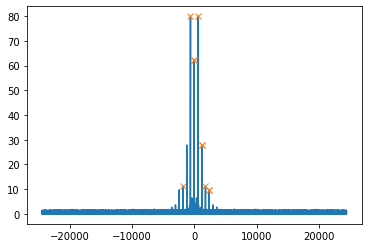

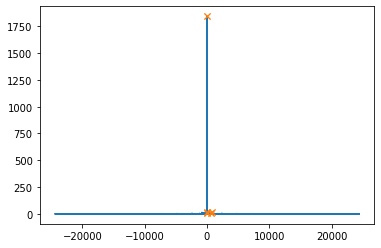

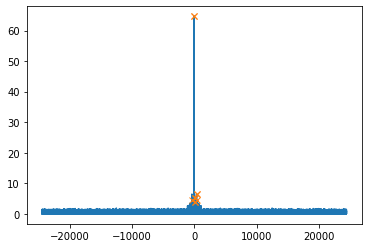

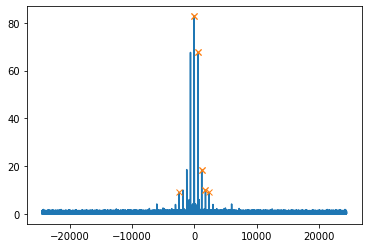

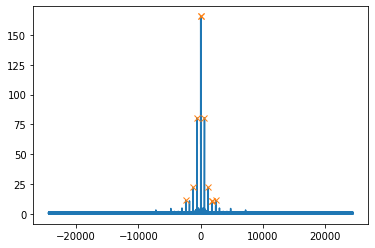

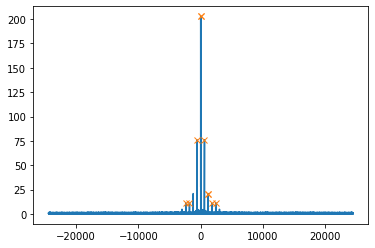

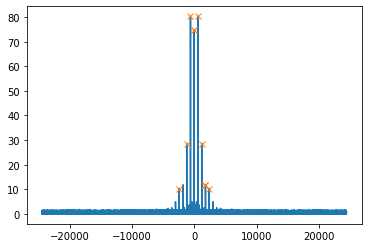

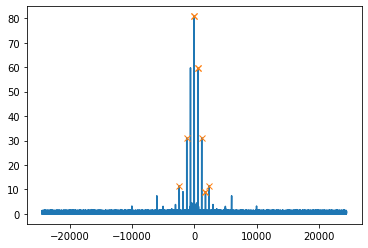

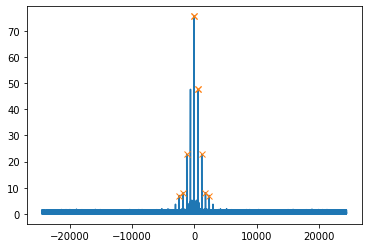

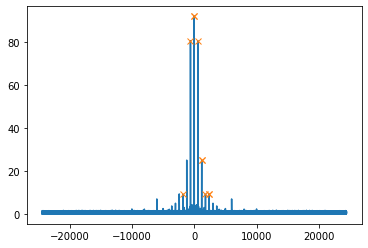

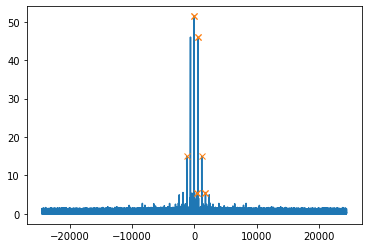

<Figure size 432x288 with 0 Axes>

In [153]:
for f, t, h, a in zip( frequencies, transforms, harmonics, max_amplitudes):
    plt.clf()
    plt.plot(f, t,'-', h, a,'x')
    plt.figure()

We now do a series of operations on our found harmonics to calculate other quantities

Let us discard negative (unphysical) harmonics.

In [166]:
harmonics = np.array( [ list( filter( lambda el: el > 0, x)  ) for x in harmonics ] )

C:\Users\bvptr\AppData\Local\Temp/ipykernel_16280/1231146584.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harmonics = np.array( [ list( filter( lambda el: el > 0, x)  ) for x in harmonics ] )


Discard frequencies that certainly are not harmonics.

In [169]:
estimated_fundamental = 600
harmonics = np.array( [ list( filter( lambda el: el > estimated_fundamental, x)  ) for x in harmonics ] )

C:\Users\bvptr\AppData\Local\Temp/ipykernel_16280/3747825511.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harmonics = np.array( [ list( filter( lambda el: el > estimated_fundamental, x)  ) for x in harmonics ] )


Now, we have got a pretty great idea of what is the fundamental and what is the $i$ th harmonic. We use this knowledge to now accurately determine the period.

We use the following rationale $\left( i \text{th harmonic} \right) = \left( i \cdot \text{estimated fundamental} \pm \varepsilon \right)$

Better still is to go through our found harmonics and determine which harmonic we are dealing with too.

## test fit

In [54]:
# DON'T RUN, this is here for reference.

# found peaks:
periods_datasets = []

#29
frequencies1 = [601.418238740329, (1202.836477480658/2), (1804.254716220987/3), (2405.672954961316/4), (3007.091193701645/5), (3608.509432441974/6)]
period1 = 1/(np.mean(frequencies1))
periods_datasets.append(period1)
#79
frequencies2 = [601.3960441379214, (1202.7920882758428/2), (1804.193681064366/3), (2405.5897252022874/4), (3006.9857693402087/5), (3608.38181347813/6)]
period2 = 1/(np.mean(frequencies2))
periods_datasets.append(period2)
#80
frequencies3 = [601.3849468367175, (1202.769893673435/2), (1804.1603891607547/3), (2405.545335997472/4), (3006.9302828341897/5), (3608.3152296709072/6), (4209.705725158226/7), (4799.860203176691/8)]
period3 = 1/(np.mean(frequencies3))
periods_datasets.append(period3)
#81
frequencies4 = [601.3849468367175, (1202.769893673435/2), (1804.1492918595509/3), (2405.5342386962684/4), (3006.919185532986/5), (3608.3041323697034/6)]
period4 = 1/(np.mean(frequencies4))
periods_datasets.append(period4)
#82
frequencies5 = [601.3904954873194, (1202.7809909746388/2), (1804.1714864619585/3), (2405.5619819492777/4), (3006.9524774365973/5), (3608.342972923917/6), (4209.733468411237/7)]
period5 = 1/(np.mean(frequencies5))
periods_datasets.append(period5)
#83
frequencies6 = [601.4015927885233, (1202.8087342276485/2), (1804.2103270161717/3), (2405.617468455297/4), (3007.01906124382/5), (3608.426202682945/6)]
period6 = 1/(np.mean(frequencies6))
periods_datasets.append(period6)
#84
frequencies7 = [601.418238740329, (1202.84202613126/2), (1804.2602648715888/3), (2405.68405226252/4), (3007.1022910028487/5)]
period7 = 1/(np.mean(frequencies7))
periods_datasets.append(period7)
#85
frequencies8 = [601.4348846921347, (1202.8697693842694/2), (1804.2991054258023/3), (2405.733990117937/4), (3007.1688748100714/5), (3608.6037595022062/6)]
period8 = 1/(np.mean(frequencies8))
periods_datasets.append(period8)
#86
frequencies9 = [601.4404333427366, (1202.8808666854732/2), (1804.3213000282099/3), (2405.7561847203447/4), (3007.196618063081/5),]
period9 = 1/(np.mean(frequencies9))
periods_datasets.append(period9)
#87
frequencies10 = [601.4348846921347, (1202.8697693842694/2), (1804.310202727006/3), (2405.745087419141/4), (3007.179972111275/5), (3608.61485680341/6)]
period10 = 1/(np.mean(frequencies10))
periods_datasets.append(period10)
#88
frequencies11 = [601.4293360415328, (1202.8531234324637/2), (1804.2824594739964/3), (2405.7062468649274/4)]
period11 = 1/(np.mean(frequencies11))
periods_datasets.append(period11)


# found MJD's
list_MJD =  list( mjd_dict.values() )
# but we skip the following datasets for now:
del list_MJD[1] # skip dataset 2
del list_MJD[2] # skip dataset 3
del list_MJD[-1] # skip dataset 14


print(len(list_MJD))
print(len(periods_datasets))
print(periods_datasets)
print(list_MJD)


11
11
[0.0016627364046931813, 0.0016627953391468015, 0.0016633109334621597, 0.0016628308808149732, 0.0016628131097909664, 0.0016627767166011553, 0.0016627310867354046, 0.0016626928137830803, 0.0016626764262373586, 0.0016626879562865453, 0.001662710837899844]
[56299.61949397883, 56300.44103724313, 56300.38548061164, 56300.42714808649, 56300.34381312978, 56300.48270470806, 56300.4688155539, 56300.32992396778, 56300.413258929024, 56300.39936977075, 56300.35770229113]
